In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import re
from matplotlib.patches import Patch

In [23]:
roles = ['Analyst', 'Engineer', 'Scientist']

In [24]:
file_path = "../output/ScrapedJobOffersAllCleaned.csv"
df = pd.read_csv(file_path)

In [25]:
def extract_data_role(title):
    title = title.lower()
    if "analyst" in title:
        return "Data Analyst"
    elif "engineer" in title:
        return "Data Engineer"
    elif "scientist" in title:
        return "Data Scientist"
    return None

df['data_role'] = df['job_title'].astype(str).apply(extract_data_role)
df_filtered = df[df['data_role'].notnull()]

In [26]:
job_counts = df_filtered.groupby(['data_role', 'city']).size().reset_index(name='count')

In [27]:
einwohner = {
    "Berlin": 3782202,
    "Hamburg": 1819160,
    "München": 1510378,
    "Frankfurt": 775790,
    "Köln": 1087353,
    "Wien": 2028399,
    "Linz": 213574,
    "Salzburg": 157652,
    "Graz": 305232
}

job_counts['einwohner'] = job_counts['city'].map(einwohner)
job_counts = job_counts[job_counts['einwohner'].notnull()]
job_counts['jobs_pro_100k'] = job_counts['count'] / job_counts['einwohner'] * 100000

In [28]:
distinct_colors = [
    "#FF5555",  # rot
    "#61AFEF",  # blau
    "#98C379",  # grün
    "#E5C07B",  # orange
    "#C678DD",  # violett
    "#56B6C2",  # türkis
    "#D19A66",  # braun-orange
    "#BE5046",  # rotbraun
    "#ABB2BF",  # hellgrau
    "#FF79C6",  # pink
    "#F1FA8C",  # gelblich
    "#8BE9FD",  # hellblau
]

unique_cities = job_counts['city'].unique()
color_map = {city: distinct_colors[i % len(distinct_colors)] for i, city in enumerate(unique_cities)}

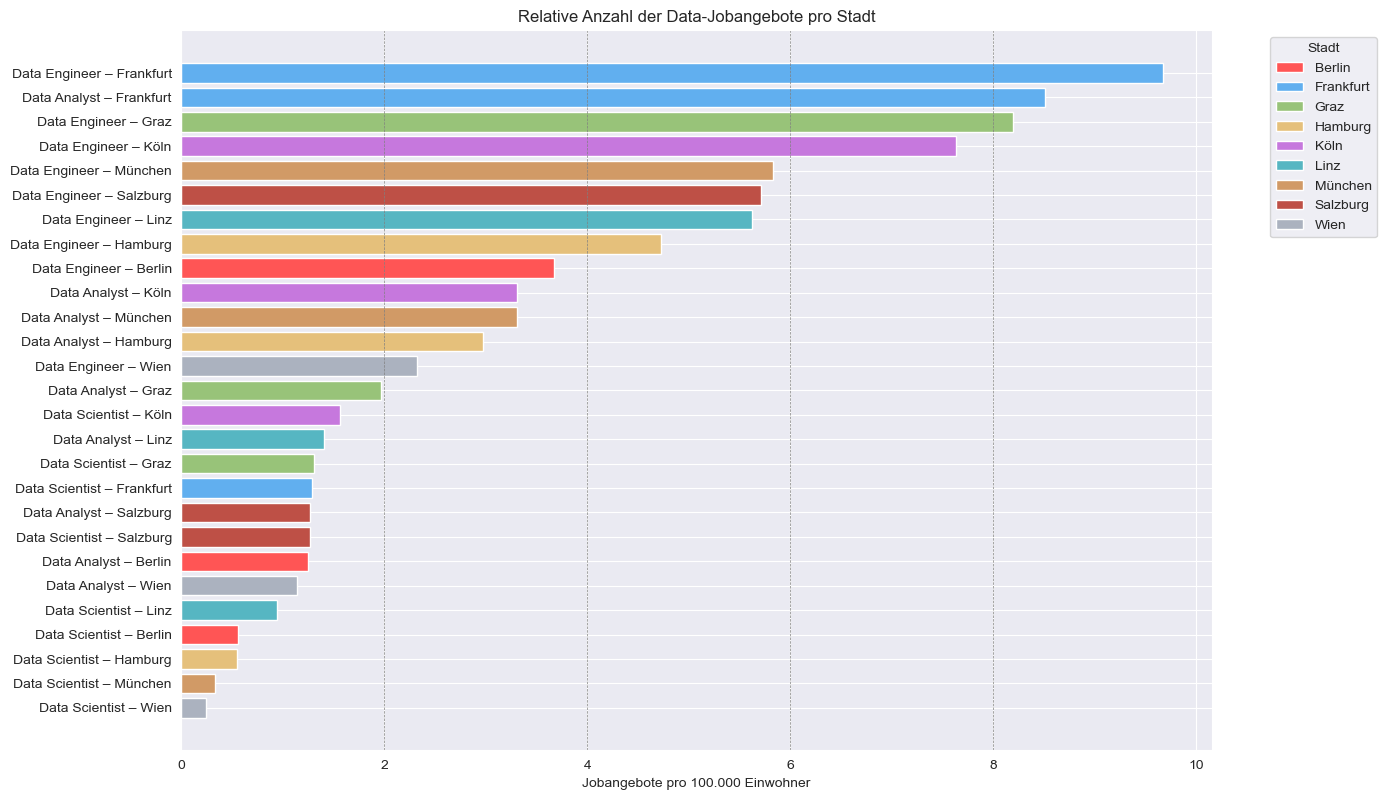

In [29]:
job_counts = job_counts.sort_values(by='jobs_pro_100k', ascending=False)


plt.figure(figsize=(14, max(6, len(job_counts) * 0.3)))

bars = plt.barh(
    job_counts['data_role'] + " – " + job_counts['city'],
    job_counts['jobs_pro_100k'],
    color=[color_map[city] for city in job_counts['city']]
)

plt.xlabel("Jobangebote pro 100.000 Einwohner")
plt.title("Relative Anzahl der Data-Jobangebote pro Stadt")
plt.gca().invert_yaxis()


max_value = job_counts['jobs_pro_100k'].max()
for x in range(2, int(max_value) + 1, 2):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)


legend_elements = [Patch(facecolor=color_map[city], label=city) for city in unique_cities if city in einwohner]
plt.legend(handles=legend_elements, title="Stadt", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

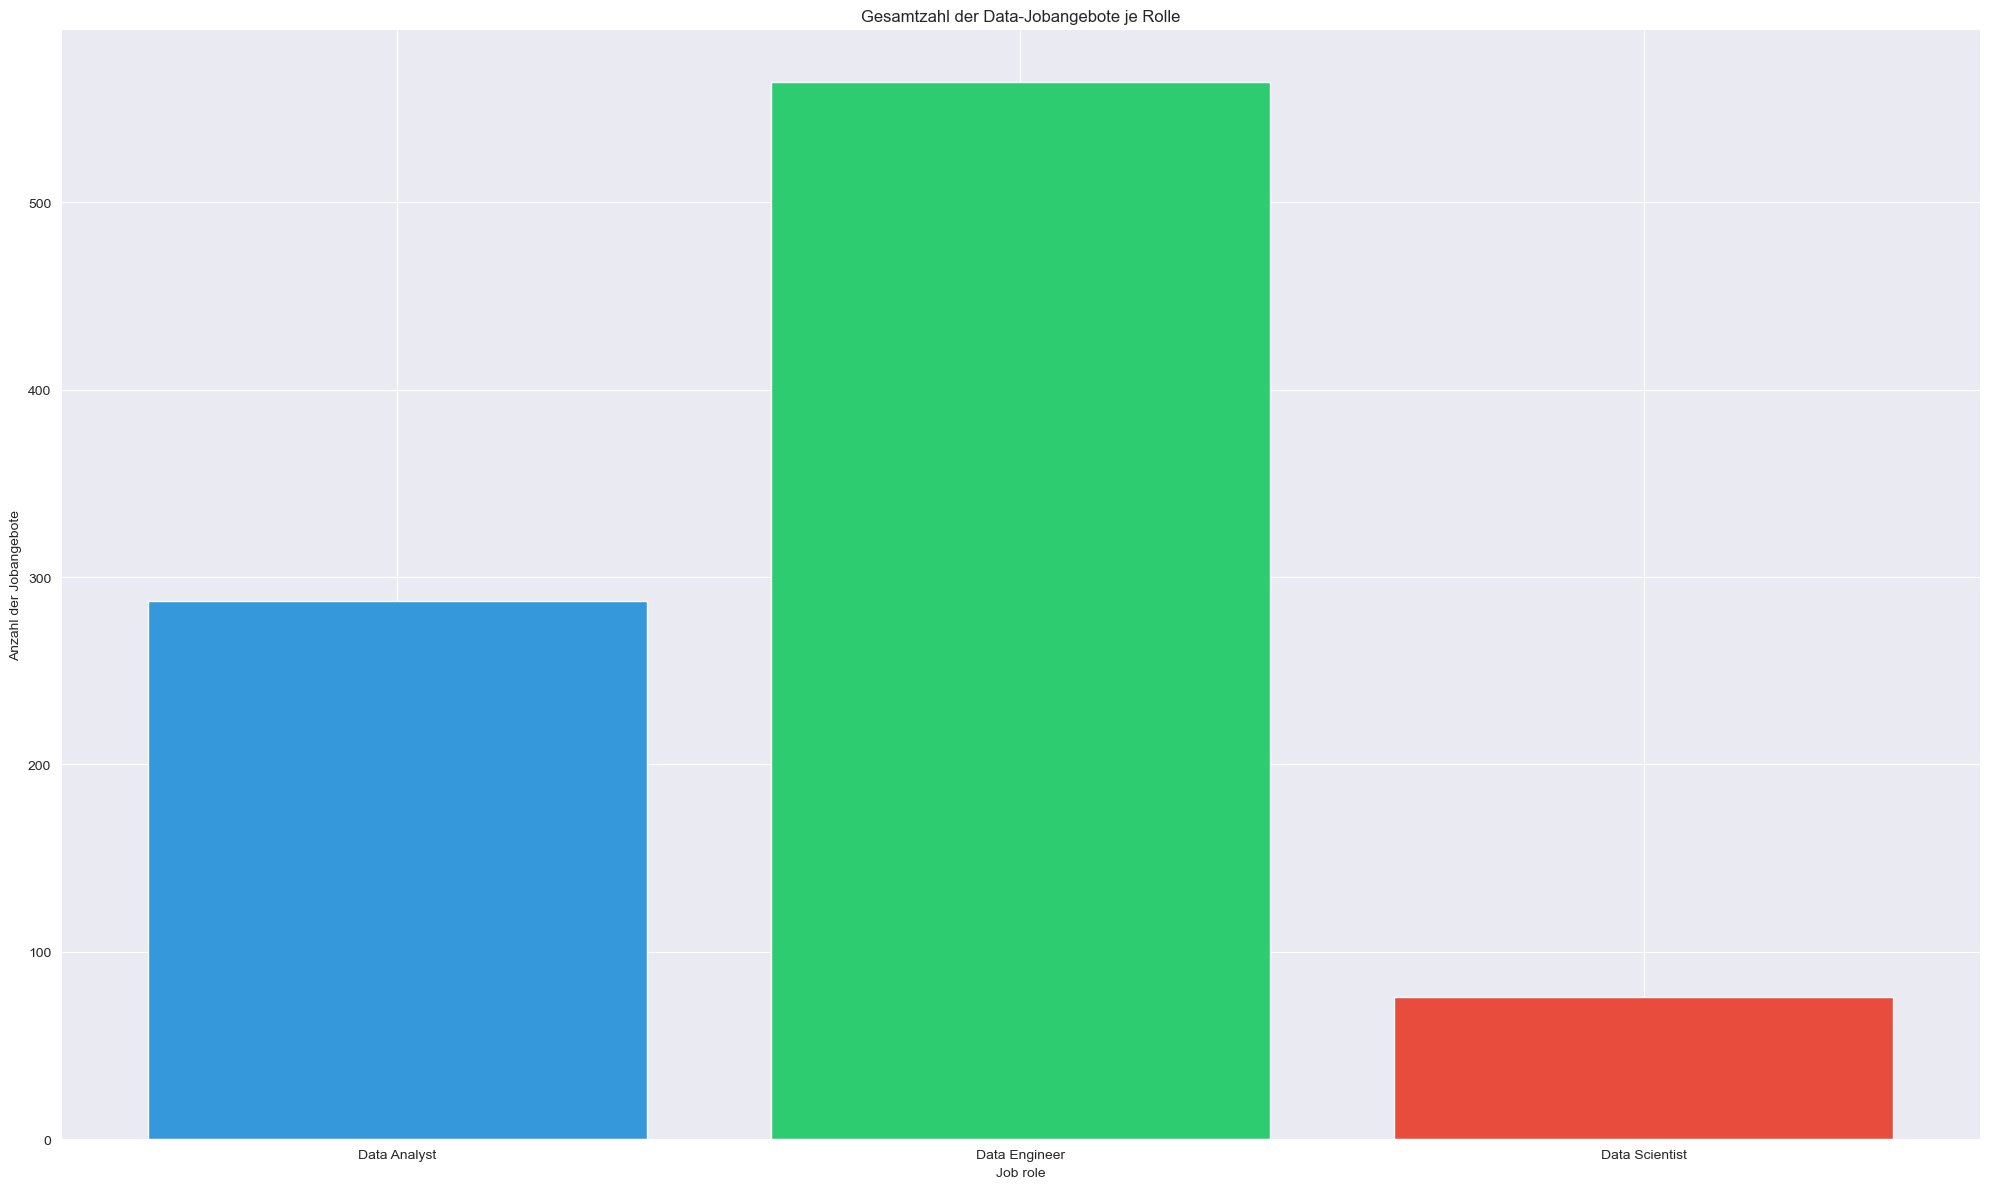

In [31]:
# Neue Aggregation: Gesamtsumme aller Städte je Rolle (unabhängig von Einwohnerzahl)
rolle_gesamt = job_counts.groupby('data_role')['count'].sum().reset_index()

# Balkendiagramm: Absolute Anzahl je Rolle
plt.figure(figsize=(20, 12))
colors = ['#3498DB', '#2ECC71', '#E74C3C']  # Blau, Grün, Rot (deutlich unterscheidbar)

plt.bar(
    rolle_gesamt['data_role'],
    rolle_gesamt['count'],
    color=colors
)

plt.title("Gesamtzahl der Data-Jobangebote je Rolle")
plt.ylabel("Anzahl der Jobangebote")
plt.xlabel("Job role")
plt.tight_layout()
plt.show()